# 1

In [ ]:
#!pip install keras-tuner --upgrade # install keras-tuner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 133 kB 4.8 MB/s 


In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from tensorflow.keras.layers import Bidirectional

import keras_tuner as kt
from tensorflow import keras

# 02

In [ ]:
df=pd.read_csv("time_step1.csv")

In [ ]:
df.shape

(1059, 149)

In [ ]:
df.head()

,PATNO,EVENT_ID,NUPSOURC1a,NP1COG,NP1HALL,NP1ANXS,NP1APAT,NP1DDS,NUPSOURC1,NP1SLPN,...,ESS2,ESS3,ESS4,ESS5,ESS6,ESS7,ESS8,NHY_y1,DEPRS_y2,DEPRS_scale_y3
0,3001,BL,1,0,0,1,0,0,1,0,...,3,0,0,2,0,0,0,1,0,0
1,3002,BL,1,1,0,1,0,0,1,0,...,1,3,3,1,0,3,0,2,0,1
2,3003,BL,1,0,0,0,0,0,1,3,...,1,1,2,2,0,1,0,2,0,0
3,3010,BL,1,1,0,1,1,0,1,3,...,1,0,0,1,0,0,0,2,0,0
4,3012,BL,1,1,0,0,1,0,1,0,...,1,1,1,2,0,1,0,2,1,0


In [ ]:
df = df.drop(['EVENT_ID','PATNO','NHY_y1','DEPRS_scale_y3'], axis=1)

In [ ]:
df.tail()

,NUPSOURC1a,NP1COG,NP1HALL,NP1ANXS,NP1APAT,NP1DDS,NUPSOURC1,NP1SLPN,NP1SLPD,NP1PAIN,...,PTCGBOTH_y,ESS1,ESS2,ESS3,ESS4,ESS5,ESS6,ESS7,ESS8,DEPRS_y2
1054,1,0,0,0,0,0,1,2,0,1,...,1,0,1,0,2,2,1,0,0,0
1055,1,0,0,0,0,0,1,0,2,0,...,1,3,0,0,1,0,0,0,0,0
1056,1,0,0,0,0,0,1,1,1,1,...,1,1,1,0,1,3,0,3,0,1
1057,1,0,0,0,0,0,1,2,2,1,...,1,1,1,1,0,3,0,1,0,0
1058,1,0,0,0,0,0,1,4,2,2,...,1,3,1,1,1,2,0,0,0,0


In [ ]:
test_split=round(len(df)*0.20)

In [ ]:
test_split

212

In [ ]:
df_for_training=df[:-212]
df_for_testing=df[-212:]

In [ ]:
print(df_for_training.shape)
print(df_for_testing.shape)

(847, 145)
(212, 145)


In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
df_for_training_scaled = scaler.fit_transform(df_for_training)

In [ ]:
df_for_testing_scaled=scaler.transform(df_for_testing)

In [ ]:
df_for_training_scaled

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.33333333, 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.33333333, 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.33333333, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
df_for_training_scaled.shape

(847, 145)

In [ ]:
df_for_testing_scaled.shape

(212, 145)

In [ ]:
def createXY(dataset,n_past):
    dataX = []
    dataY = []
    for i in range(n_past, len(dataset)):
            dataX.append(dataset[i - n_past:i, 0:dataset.shape[1]])
            dataY.append(dataset[i,0])
    return np.array(dataX),np.array(dataY)   

In [ ]:
trainX,trainY=createXY(df_for_training_scaled,30)

In [ ]:
trainX.shape

(817, 30, 145)

In [ ]:
testX,testY=createXY(df_for_testing_scaled,30)

In [ ]:
trainX[0]

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.33333333, 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.33333333, 0.        ,
        0.        ],
       ...,
       [0.        , 0.33333333, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
print("trainX Shape-- ",trainX.shape)
print("trainY Shape-- ",trainY.shape)

trainX Shape--  (817, 30, 145)
trainY Shape--  (817,)


In [ ]:
print("testX Shape-- ",testX.shape)
print("testY Shape-- ",testY.shape)

testX Shape--  (182, 30, 145)
testY Shape--  (182,)


In [ ]:
print("trainX[0]-- \n",trainX[0])
print("\ntrainY[0]-- ",trainY[0])

trainX[0]-- 
 [[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.33333333 0.         ... 1.         0.         0.        ]
 [0.         0.         0.         ... 0.33333333 0.         0.        ]
 ...
 [0.         0.33333333 0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]

trainY[0]--  0.0


In [ ]:
trainY

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [ ]:
trainY.shape

(817,)

# 03

In [ ]:
# from keras.wrappers.scikit_learn import KerasRegressor
# from sklearn.model_selection import GridSearchCV

In [ ]:
# # BILSTM
# def build_model(optimizer):
#     grid_model = Sequential()
#     grid_model.add(Bidirectional(LSTM(256,return_sequences=True,input_shape=(30, 145))))
#     grid_model.add(Bidirectional(LSTM(128)))
#     grid_model.add(Dropout(0.2))
#     grid_model.add(Dense(10))
#     grid_model.compile(loss = 'mse', optimizer = optimizer)
#     return grid_model

# grid_model = KerasRegressor(build_fn=build_model,verbose=1,validation_data=(testX,testY))
# parameters = {'batch_size' : [16,20,50],
#               'epochs' : [50,75,100],
#               'optimizer' : ['adam','Adadelta','Adagrad'] }

# grid_search  = GridSearchCV(estimator = grid_model,
#                             param_grid = parameters,
#                             cv = 5)

In [ ]:
#LSTM

# def build_model(optimizer):
#     grid_model = Sequential()
#     grid_model.add(LSTM(50,return_sequences=True,input_shape=(30,5)))
#     grid_model.add(LSTM(50))
#     grid_model.add(Dropout(0.2))
#     grid_model.add(Dense(1))

#     grid_model.compile(loss = 'mse',optimizer = optimizer)
#     return grid_model

# grid_model = KerasRegressor(build_fn=build_model,verbose=1,validation_data=(testX,testY))
# parameters = {'batch_size' : [16,20],
#               'epochs' : [8,10],
#               'optimizer' : ['adam','Adadelta'] }

# grid_search  = GridSearchCV(estimator = grid_model,
#                             param_grid = parameters,
#                             cv = 2)

In [ ]:
# Keras Auto Tuner
  # trainX,trainY    testX,testY

In [ ]:
# def build_model(hp):
#   model = keras.Sequential()
#   model.add(keras.layers.Dense(hp.Choice('units', [8, 16, 32]),activation='relu'))
#   model.add(keras.layers.Dense(1, activation='relu'))
#   model.compile(loss='mse')
#   return model

# 04

In [ ]:
#######################################working model##########################

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import keras_tuner
import tensorflow as tf

from matplotlib import pyplot as plt
from tensorflow import keras
from kerastuner.tuners import BayesianOptimization
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.utils import plot_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Bidirectional
from sklearn.preprocessing import MinMaxScaler

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  if __name__ == '__main__':


In [ ]:
import numpy as np
np.seterr(divide='ignore', invalid='ignore')
# to avoid RuntimeWarning: invalid value encountered in divide

{'divide': 'warn', 'invalid': 'warn', 'over': 'warn', 'under': 'ignore'}

In [ ]:
# Model configuration
batch_size = 25 #50 give error
loss_function = sparse_categorical_crossentropy
no_classes = 2 #n
no_epochs = 75 # 50,75,100
validation_split = 0.2
verbosity = 1

# https://stackoverflow.com/questions/43906048/which-parameters-should-be-used-for-early-stopping
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              min_delta=0,
                                              patience=5,
                                              verbose=1, 
                                              mode='auto')

In [ ]:
#biLSTM
def build_model(hp):

  model = Sequential()
  model.add(Bidirectional(LSTM(hp.Int('input_unit',min_value=32,max_value=512,step=32),activation='tanh',return_sequences=True, input_shape=(30, 145))))
  
  for i in range(hp.Int('n_layers', 1, 4)):
      model.add(Bidirectional(LSTM(hp.Int(f'lstm_{i}_units',min_value=32,max_value=512,step=32),activation='tanh',return_sequences=True)))
  model.add(Bidirectional(LSTM(hp.Int('layer_2_neurons',min_value=32,max_value=512,step=32),activation='tanh')))
  #activation=hp.Choice('dense_activation',values=['relu', 'sigmoid'],default='relu')
  model.add(Dropout(hp.Float('Dropout_rate',min_value=0,max_value=0.5,step=0.1)))
  model.add(Dense(trainY.shape[0], activation='sigmoid'))
  

  # # Display a model summary
    # model.summary()

    # Compile the model
  model.compile(loss=loss_function,
                    optimizer=Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
                    metrics=['accuracy'])
    
    # Return the model
  return model

# define model
tuner = BayesianOptimization(
        build_model,
        objective='accuracy',
        max_trials=5 , # 5 (is good ),7, 10
        executions_per_trial=5, # 2,3,5,
        #directory=os.path.normpath('C:/keras_tuning'),
        project_name='timeseries_bayes_opt_POC',
        overwrite=True)

In [ ]:
# Display search space summary

tuner.search_space_summary()

Search space summary
Default search space size: 6
input_unit (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
n_layers (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 4, 'step': 1, 'sampling': None}
lstm_0_units (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
layer_2_neurons (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
Dropout_rate (Float)
{'default': 0.0, 'conditions': [], 'min_value': 0.0, 'max_value': 0.5, 'step': 0.1, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [ ]:
# Perform random search
tuner.search(trainX, trainY, epochs=no_epochs, validation_split=validation_split, callbacks=[stop_early])


Search: Running Trial #1

Value             |Best Value So Far |Hyperparameter
64                |?                 |input_unit
3                 |?                 |n_layers
96                |?                 |lstm_0_units
64                |?                 |layer_2_neurons
0                 |?                 |Dropout_rate
0.0001            |?                 |learning_rate

Epoch 1/75
21/21 [==============================] - 24s 177ms/step - loss: 6.4989 - accuracy: 0.6447 - val_loss: 6.1984 - val_accuracy: 0.9817
Epoch 2/75
21/21 [==============================] - 1s 33ms/step - loss: 5.9348 - accuracy: 0.9112 - val_loss: 5.4472 - val_accuracy: 0.9817
Epoch 3/75
21/21 [==============================] - 1s 29ms/step - loss: 5.0942 - accuracy: 0.9112 - val_loss: 4.4240 - val_accuracy: 0.9817
Epoch 4/75
21/21 [==============================] - 1s 29ms/step - loss: 4.0767 - accuracy: 0.9112 - val_loss: 3.3459 - val_accuracy: 0.9817
Epoch 5/75
21/21 [==============================]

KeyboardInterrupt: ignored

In [ ]:
# Get best model
models = tuner.get_best_models(num_models=1)
best_model = models[0]

In [ ]:
# Fit data to model
history = best_model.fit(trainX, trainY,
            batch_size=batch_size,
            epochs=no_epochs,
            verbose=verbosity,
            validation_split=validation_split)

Epoch 1/75
27/27 [==============================] - 28s 315ms/step - loss: 0.6222 - accuracy: 0.9112 - val_loss: 0.1309 - val_accuracy: 0.9817
Epoch 2/75
27/27 [==============================] - 4s 157ms/step - loss: 0.4023 - accuracy: 0.9112 - val_loss: 0.1604 - val_accuracy: 0.9817
Epoch 3/75
27/27 [==============================] - 4s 156ms/step - loss: 0.3291 - accuracy: 0.9112 - val_loss: 0.1341 - val_accuracy: 0.9817
Epoch 4/75
27/27 [==============================] - 4s 156ms/step - loss: 0.3268 - accuracy: 0.9112 - val_loss: 0.1234 - val_accuracy: 0.9817
Epoch 5/75
27/27 [==============================] - 4s 157ms/step - loss: 0.3190 - accuracy: 0.9112 - val_loss: 0.1285 - val_accuracy: 0.9817
Epoch 6/75
27/27 [==============================] - 4s 157ms/step - loss: 0.3228 - accuracy: 0.9112 - val_loss: 0.1296 - val_accuracy: 0.9817
Epoch 7/75
27/27 [==============================] - 4s 156ms/step - loss: 0.3342 - accuracy: 0.9112 - val_loss: 0.1241 - val_accuracy: 0.9817
Epoch

In [ ]:
tuner.results_summary()

Results summary
Results in ./timeseries_bayes_opt_POC
Showing 10 best trials
Trial summary
Hyperparameters:
input_unit: 448
n_layers: 3
lstm_0_units: 192
layer_2_neurons: 256
Dropout_rate: 0.4
learning_rate: 0.0001
lstm_1_units: 32
lstm_2_units: 32
Score: 0.9111791849136353
Trial summary
Hyperparameters:
input_unit: 32
n_layers: 4
lstm_0_units: 96
layer_2_neurons: 256
Dropout_rate: 0.1
learning_rate: 0.0001
lstm_1_units: 160
lstm_2_units: 128
lstm_3_units: 32
Score: 0.9111791849136353
Trial summary
Hyperparameters:
input_unit: 480
n_layers: 2
lstm_0_units: 288
layer_2_neurons: 416
Dropout_rate: 0.0
learning_rate: 0.01
lstm_1_units: 128
lstm_2_units: 128
lstm_3_units: 256
Score: 0.9111791849136353
Trial summary
Hyperparameters:
input_unit: 192
n_layers: 3
lstm_0_units: 224
layer_2_neurons: 448
Dropout_rate: 0.0
learning_rate: 0.0001
lstm_1_units: 160
lstm_2_units: 352
lstm_3_units: 480
Score: 0.9111791849136353
Trial summary
Hyperparameters:
input_unit: 480
n_layers: 3
lstm_0_units: 288

In [ ]:
# Generate generalization metrics
score = best_model.evaluate(testX,testY, verbose=1)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')


6/6 [==============================] - 0s 65ms/step - loss: 0.1263 - accuracy: 0.9835
Test loss: 0.12626290321350098 / Test accuracy: 0.9835164546966553


In [ ]:
# LAst run

# Trial 5 Complete [00h 01m 35s]
# accuracy: 0.8701378345489502

# Best accuracy So Far: 0.8701378345489502
# Total elapsed time: 00h 13m 58s
# INFO:tensorflow:Oracle triggered exit
# 66/66 [==============================] - 20s 114ms/step - loss: 0.3241 - accuracy: 0.9112 - val_loss: 0.1352 - val_accuracy: 0.9817

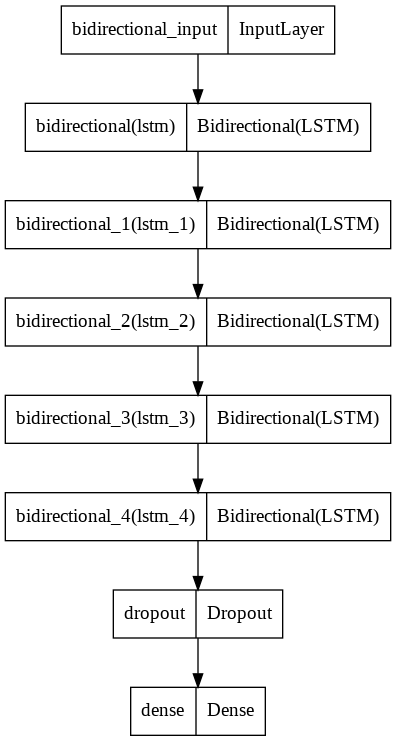

In [ ]:
plot_model(best_model, to_file='model.png')

In [ ]:
tuner.results_summary()

Results summary
Results in ./timeseries_bayes_opt_POC
Showing 10 best trials
Trial summary
Hyperparameters:
input_unit: 448
n_layers: 3
lstm_0_units: 192
layer_2_neurons: 256
Dropout_rate: 0.4
learning_rate: 0.0001
lstm_1_units: 32
lstm_2_units: 32
Score: 0.9111791849136353
Trial summary
Hyperparameters:
input_unit: 32
n_layers: 4
lstm_0_units: 96
layer_2_neurons: 256
Dropout_rate: 0.1
learning_rate: 0.0001
lstm_1_units: 160
lstm_2_units: 128
lstm_3_units: 32
Score: 0.9111791849136353
Trial summary
Hyperparameters:
input_unit: 480
n_layers: 2
lstm_0_units: 288
layer_2_neurons: 416
Dropout_rate: 0.0
learning_rate: 0.01
lstm_1_units: 128
lstm_2_units: 128
lstm_3_units: 256
Score: 0.9111791849136353
Trial summary
Hyperparameters:
input_unit: 192
n_layers: 3
lstm_0_units: 224
layer_2_neurons: 448
Dropout_rate: 0.0
learning_rate: 0.0001
lstm_1_units: 160
lstm_2_units: 352
lstm_3_units: 480
Score: 0.9111791849136353
Trial summary
Hyperparameters:
input_unit: 480
n_layers: 3
lstm_0_units: 288

In [ ]:
##########################################################################################################################################

# New Section

In [ ]:
#LSTM

def build_model(hp):

  model = Sequential()
  model.add(LSTM(hp.Int('input_unit',min_value=32,max_value=512,step=32),return_sequences=True, input_shape=(30, 145)))
  
  for i in range(hp.Int('n_layers', 1, 4)):
      model.add(LSTM(hp.Int(f'lstm_{i}_units',min_value=32,max_value=512,step=32),return_sequences=True))
      model.add(LSTM(hp.Int('layer_2_neurons',min_value=32,max_value=512,step=32)))
      model.add(Dropout(hp.Float('Dropout_rate',min_value=0,max_value=0.5,step=0.1)))
      model.add(Dense(trainY.shape[0], activation=hp.Choice('dense_activation',values=['relu', 'sigmoid'],default='relu')))
      model.compile(loss='mean_squared_error', optimizer='adam',metrics = ['mse'])

    # Display a model summary
      model.summary()

    # Compile the model
      model.compile(loss=loss_function,
                  optimizer=Adam(
                    hp.Choice('learning_rate',
                              values=[1e-2, 1e-3, 1e-4])),
                  metrics=['accuracy'])
    
    # Return the model
      return model

# Perform tuning
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=1,
    executions_per_trial=1,
    directory='tuning_dir',
    project_name='machinecurve_example')

In [ ]:
# Display search space summary
tuner.search_space_summary()

# Perform random search
tuner.search(trainX, trainY,
             epochs=5,
             validation_split=validation_split)

# Get best model
models = tuner.get_best_models(num_models=1)
best_model = models[0]

# Fit data to model
history = best_model.fit(trainX, trainY,
            batch_size=batch_size,
            epochs=no_epochs,
            verbose=verbosity,
            validation_split=validation_split)


In [ ]:
# Generate generalization metrics
score = best_model.evaluate(testX,testY, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

Test loss: 0.1201951801776886 / Test accuracy: 0.9835164546966553


In [ ]:
tuner = kt.RandomSearch(build_model,objective='val_loss',max_trials=5)

INFO:tensorflow:Reloading Oracle from existing project ./untitled_project/oracle.json
INFO:tensorflow:Reloading Tuner from ./untitled_project/tuner0.json


In [ ]:
tuner.search(trainX,trainY , epochs=5, validation_data=(testX,testY))
best_model = tuner.get_best_models()[0]

INFO:tensorflow:Oracle triggered exit


In [ ]:
tuner.results_summary()

Results summary
Results in ./untitled_project
Showing 10 best trials
Trial summary
Hyperparameters:
units: 32
Score: 0.016483517363667488
Trial summary
Hyperparameters:
units: 16
Score: 0.016566326841711998
Trial summary
Hyperparameters:
units: 8
Score: 0.016690729185938835
